#### Problem Statement: Analyzing factors effecting Customer Preferences and Market Trends in the Amazon Helmet Segment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hd=pd.read_csv('ramcharan.csv')

In [3]:
hd=hd.drop(columns='Unnamed: 0.1')

In [4]:
d=hd.describe(include='all')

In [5]:
for x in d:
    if d.loc['unique',x]<10:
        hd[x]=hd[x].astype('category')

In [6]:
hd['Material Used']=hd['Material Used'].astype('category')

In [7]:
lp=(hd['Price'].max()/100)*33.3
mp=(hd['Price'].max()/100)*66.6
lw=(hd['Weight (in Killograms)'].max()/100)*33.3
mw=(hd['Weight (in Killograms)'].max()/100)*66.6

In [8]:
# lp,mp,lw,mw

(2314.35, 4628.7, 0.7795529999999999, 1.5591059999999999)

In [10]:
maxprice=hd['Price']

In [12]:
hd[['Brand','Material Used']].describe()

,Brand,Material Used
count,429,429
unique,14,23
top,Vega,Acrylonitrile Butadiene Styrene (ABS)
freq,115,206


### Univariate Analysis

##### Descriptive Statistics of Categorical variables

In [13]:
hd.describe(include=['category'])

,Material Used,Weight Status
count,429,429
unique,23,3
top,Acrylonitrile Butadiene Styrene (ABS),Medium Weight
freq,206,343


##### Descriptive Statistics of Numerical variables

In [14]:
hd.describe(include=['float','int'])

,Unnamed: 0,Weight (in Killograms),Price,Rating,Reviews,Positive Rating (%)
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,132.337995,1.271000,2223.116550,4.158741,3198.109557,89.079254
std,105.588560,0.352192,1524.146167,0.359126,8589.597607,2.488903
min,0.000000,0.244000,199.000000,3.000000,1.000000,77.000000
25%,26.000000,1.000000,1163.000000,4.000000,20.000000,88.000000
50%,118.000000,1.250000,1721.000000,4.200000,148.000000,89.000000
75%,225.000000,1.500000,2399.000000,4.300000,1422.000000,91.000000
max,332.000000,2.341000,6950.000000,5.000000,46391.000000,92.000000


#### distrubution of numerical columns

In [15]:
num=hd.select_dtypes(['float','int'])

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

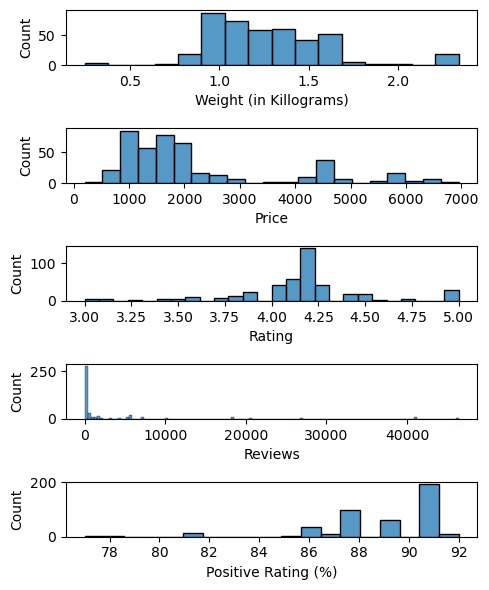

In [16]:
fig,axs=plt.subplots(5,figsize=(5,6))
cols=['Weight (in Killograms)', 'Price', 'Rating', 'Reviews','Positive Rating (%)']
for x,y in enumerate(axs):
    sns.histplot(data=num,x=cols[x],ax=y)
plt.tight_layout()
    #print(x,y)
plt.savefig("numdist.png", dpi=300, bbox_inches='tight')

#### Distrubution of categorical variables

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


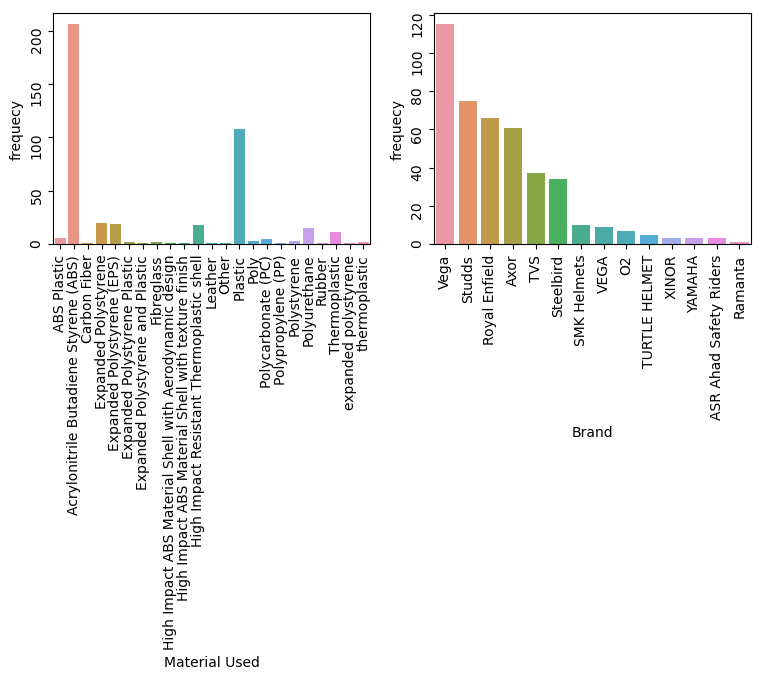

In [17]:
fig,axs=plt.subplots(1,2,figsize=(9,3))
sns.barplot(data=hd,x=hd['Material Used'].value_counts().index,y=hd['Material Used'].value_counts().values,ax=axs[0])
axs[0].tick_params(rotation=90)
axs[0].set_ylabel('frequecy')

sns.barplot(data=hd,x=hd['Brand'].value_counts().index,y=hd['Brand'].value_counts().values,ax=axs[1])
axs[1].tick_params(rotation=90)
axs[1].set_ylabel('frequecy')

plt.savefig("catdist.png", dpi=300, bbox_inches='tight')

In [18]:
catg=hd.select_dtypes('category')

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


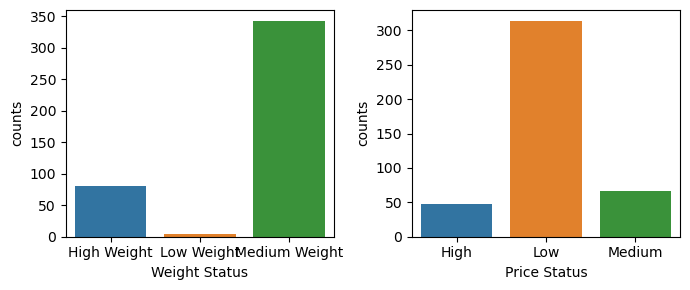

In [50]:
fig,axs=plt.subplots(1,2,figsize=(7,3))
sns.barplot(data=hd,x=hd['Weight Status'].value_counts().index,y=hd['Weight Status'].value_counts().values,ax=axs[0])
plt.tight_layout()
axs[0].set_ylabel('counts')
sns.barplot(data=hd,x=hd['Price Status'].value_counts().index,y=hd['Price Status'].value_counts().values,ax=axs[1])
axs[1].set_ylabel('counts')
plt.tight_layout()

#sns.barplot(data=catg,x=['Weight Status'],ax=axs[0])

### Bivariate Analysis

<Axes: xlabel='Weight (in Killograms)', ylabel='Price'>

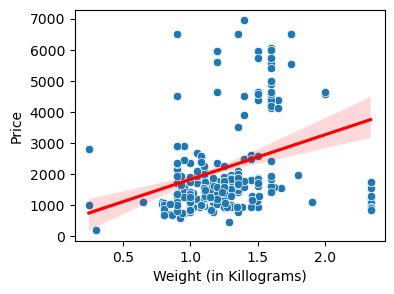

In [19]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Price'])
sns.regplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Price'],scatter=False,color='red')

<Axes: xlabel='Weight (in Killograms)', ylabel='Rating'>

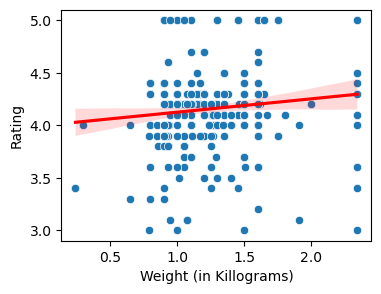

In [155]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Rating'])
sns.regplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Rating'],scatter=False,color='red')

<Axes: xlabel='Weight (in Killograms)', ylabel='Reviews'>

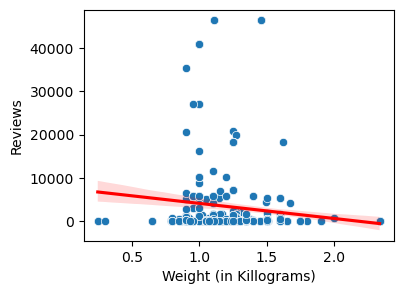

In [156]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Reviews'])
sns.regplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Reviews'],scatter=False,color='red')

<Axes: xlabel='Weight (in Killograms)', ylabel='Positive Rating (%)'>

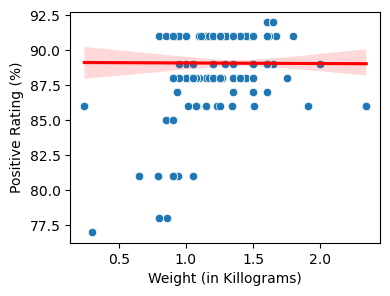

In [157]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Positive Rating (%)'])
sns.regplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Positive Rating (%)'],scatter=False,color='red')

<Axes: xlabel='Price', ylabel='Rating'>

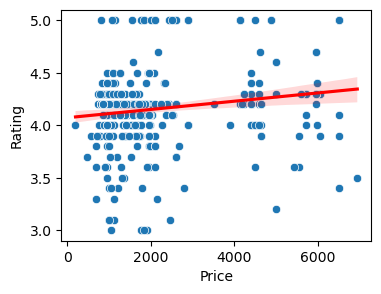

In [158]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=hd,x=hd['Price'],y=hd['Rating'])
sns.regplot(data=hd,x=hd['Price'],y=hd['Rating'],scatter=False,color='red')

<Axes: xlabel='Price', ylabel='Reviews'>

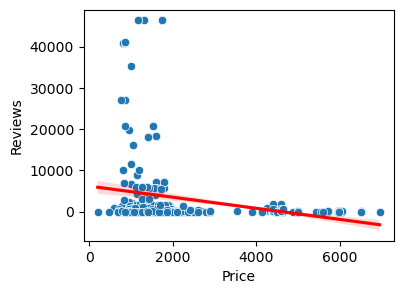

In [209]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=hd,x=hd['Price'],y=hd['Reviews'])
sns.regplot(data=hd,x=hd['Price'],y=hd['Reviews'],scatter=False,color='red')

<Axes: xlabel='Price', ylabel='Positive Rating (%)'>

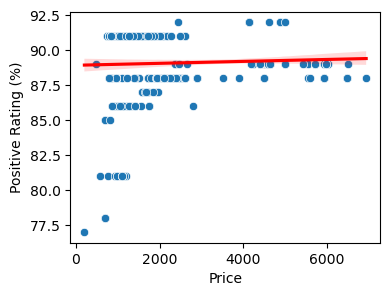

In [159]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=hd,x=hd['Price'],y=hd['Positive Rating (%)'])
sns.regplot(data=hd,x=hd['Price'],y=hd['Positive Rating (%)'],scatter=False,color='red')

<Axes: xlabel='Price', ylabel='Rating'>

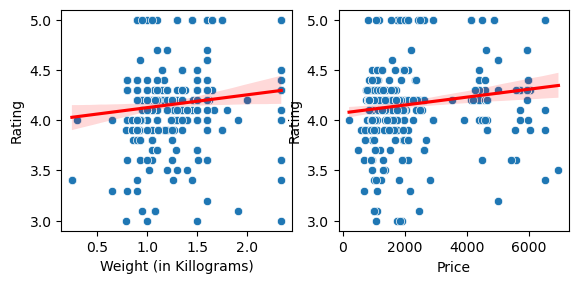

In [20]:
fig,axs=plt.subplots(1,2,figsize=(6,3))
sns.scatterplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Rating'],ax=axs[0])
sns.regplot(data=hd,x=hd['Weight (in Killograms)'],y=hd['Rating'],ax=axs[0],scatter=False,color='red')
plt.tight_layout()

sns.scatterplot(data=hd,x=hd['Price'],y=hd['Rating'],ax=axs[1])
sns.regplot(data=hd,x=hd['Price'],y=hd['Rating'],ax=axs[1],scatter=False,color='red')

In [21]:
data=hd[(hd['Weight (in Killograms)']>1.0)&(hd['Price']>2500)]

In [22]:
#data=hd[(hd['Weight (in Killograms)']>1.5)&(hd['Rating']>4.0)]

In [23]:
data.pivot_table(index='Brand',values=['Price','Weight (in Killograms)'],aggfunc='mean' )#business analysis

,Price,Weight (in Killograms)
Brand,,
Axor,4863.736842,1.564035
Royal Enfield,4926.583333,1.371875
SMK Helmets,4451.444444,1.622222
Steelbird,3525.000000,1.350000
Studds,2605.000000,1.450000


In [88]:
# data.groupby('Brand')['Price'].mean().plot(kind='bar',figsize=(4,3),ylabel='Avgprice')

In [25]:
# plt.figure(figsize=(4,3))
# sns.scatterplot(data=hd,x=hd['Rating'],y=hd['Positive Rating (%)'])
# sns.regplot(data=hd,x=hd['Rating'],y=hd['Positive Rating (%)'],scatter=False,color='red')

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=hd,x=hd[''],y=hd['Positive Rating (%)'])
sns.regplot(data=hd,x=hd['Rating'],y=hd['Positive Rating (%)'],scatter=False,color='red')

In [26]:
hd.pivot_table(index='Weight Status',values='Rating',aggfunc='mean').sort_values(by='Rating',ascending=False)

,Rating
Weight Status,
High Weight,4.227160
Medium Weight,4.150437
Low Weight,3.620000


C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Weight Status', ylabel='Rating'>

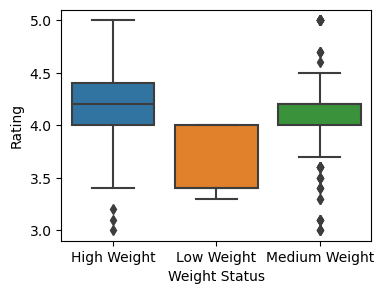

In [162]:
plt.figure(figsize=(4,3))
sns.boxplot(data=hd,x=hd['Weight Status'],y=hd['Rating'])

C:\Users\sujit\AppData\Local\Temp\ipykernel_19168\2015495046.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hd.groupby('Weight Status')['Rating'].mean().plot(kind='barh',figsize=(4,3))


<Axes: ylabel='Weight Status'>

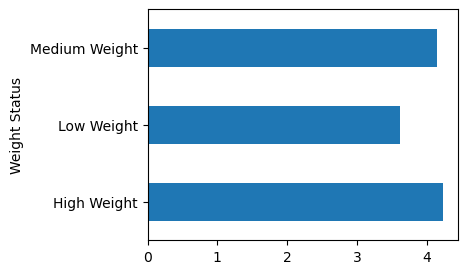

In [191]:
hd.groupby('Weight Status')['Rating'].mean().plot(kind='barh',figsize=(4,3))

In [184]:
hd.pivot_table(index='Price Status',values='Rating',aggfunc='mean').sort_values(by='Rating',ascending=False)

,Rating
Price Status,
Medium,4.270149
High,4.231250
Low,4.123885


C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Price Status', ylabel='Rating'>

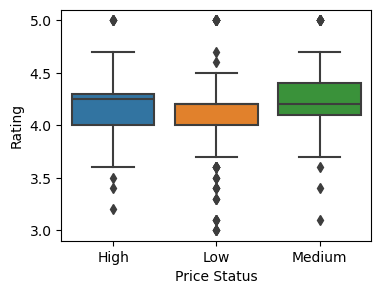

In [165]:
plt.figure(figsize=(4,3))
sns.boxplot(data=hd,x=hd['Price Status'],y=hd['Rating'])

In [192]:
hd.groupby('Price Status')['Rating'].mean()#.plot(kind='barh',figsize=(4,3))

C:\Users\sujit\AppData\Local\Temp\ipykernel_19168\4251751093.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hd.groupby('Price Status')['Rating'].mean()


Price Status
High      4.231250
Low       4.123885
Medium    4.270149
Name: Rating, dtype: float64

C:\Users\sujit\AppData\Local\Temp\ipykernel_19168\4144486522.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hd.groupby('Price Status')['Rating'].mean().plot(kind='barh',figsize=(4,3))


<Axes: ylabel='Price Status'>

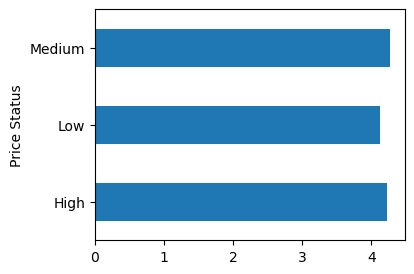

In [193]:
hd.groupby('Price Status')['Rating'].mean().plot(kind='barh',figsize=(4,3))

In [171]:
# sns.boxplot(data=hd,x=hd['Material Used'],y=hd['Rating'])
# plt.xticks(rotation=90)
# plt.show()

#### Avg Rating by Brand

In [78]:
hd.pivot_table(index='Material Used',values='Rating',aggfunc='mean').sort_values(by='Rating',ascending=False)

,Rating
Material Used,
Expanded Polystyrene (EPS),4.557895
expanded polystyrene,4.300000
Plastic,4.225000
thermoplastic,4.200000
High Impact ABS Material Shell with texture finish,4.200000
Poly,4.200000
High Impact ABS Material Shell with Aerodynamic design,4.200000
Polyurethane,4.193333
Acrylonitrile Butadiene Styrene (ABS),4.137864


<Axes: xlabel='Material Used'>

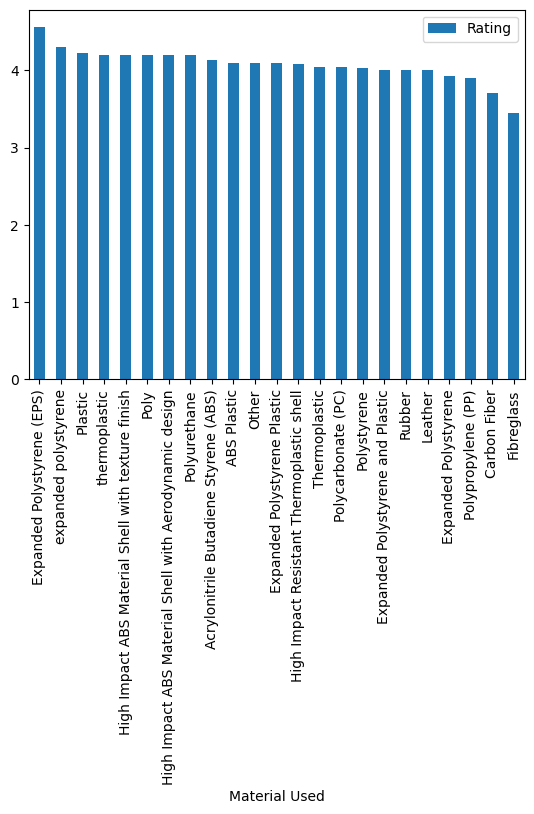

In [121]:
hd.pivot_table(index='Material Used',values='Rating',aggfunc='mean').sort_values(by='Rating',ascending=False).plot(kind='bar')

In [130]:
# lst=['Expanded Polystyrene (EPS)','Expanded Polystyrene','Plastic']

In [147]:
# lst=[]
# for x in lst:
#     print(list((hd['Material Used']==x) & (hd['Price Status']=='High') & (hd['Weight Status']=='High Weight') & (hd['Rating']>4.0)))
    

#### Material used vs Rating

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


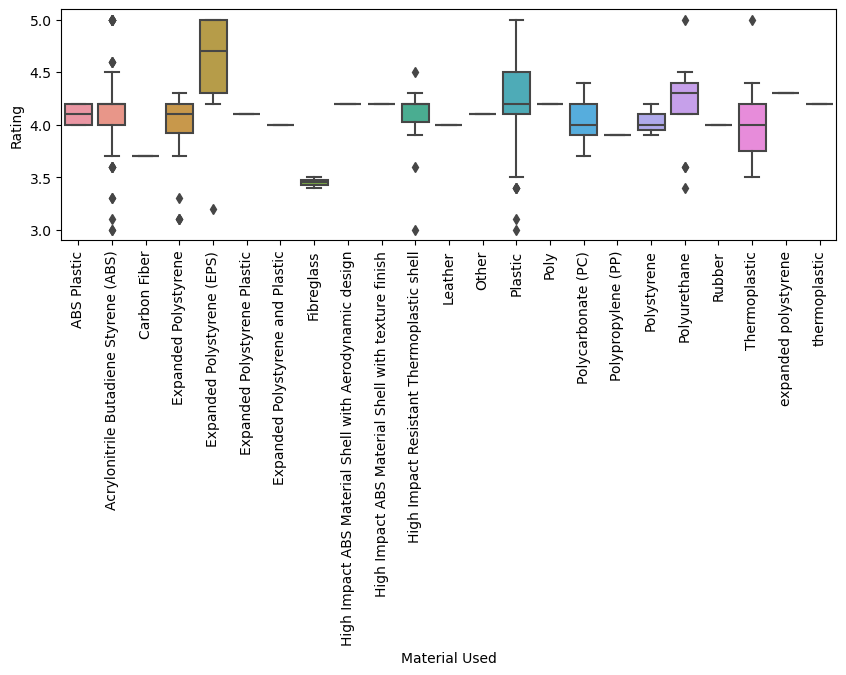

In [27]:
plt.figure(figsize=(10,3))
sns.boxplot(data=hd,x=hd['Material Used'],y=hd['Rating'])
plt.xticks(rotation=90)
plt.show()

#### Avg Rating of top 5 Colours 

In [196]:
hd.pivot_table(index='Colour',values=['Rating'],aggfunc='mean').sort_values(by='Rating',ascending=False).head()

,Rating
Colour,
MATT BLACK - MA267,5.0
CHROME RED,5.0
Eco Red,5.0
BLACK - GL263,5.0
BLACK - GL265,5.0


<Axes: xlabel='Colour'>

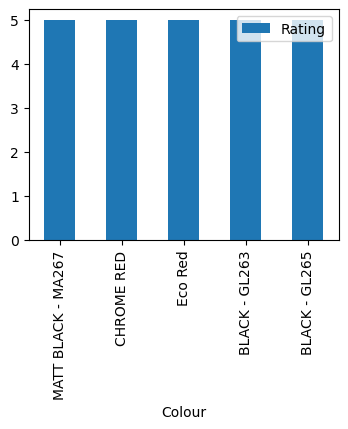

In [195]:
hd.pivot_table(index='Colour',values=['Rating'],aggfunc='mean').sort_values(by='Rating',ascending=False).head().plot(kind='bar',figsize=(4,3))

#### Avg Rating by Brand

In [199]:
hd.pivot_table(index='Brand',values=['Rating'],aggfunc='mean').sort_values(by='Rating',ascending=False).head()

,Rating
Brand,
SMK Helmets,4.710000
Studds,4.308000
XINOR,4.266667
TURTLE HELMET,4.200000
Royal Enfield,4.171212


<Axes: xlabel='Brand'>

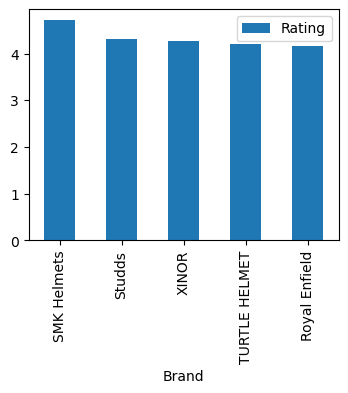

In [201]:
hd.pivot_table(index='Brand',values=['Rating'],aggfunc='mean').sort_values(by='Rating',ascending=False).head().plot(kind='bar',figsize=(4,3))

#### Mulitvariate Analysis

C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sujit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1000x600 with 0 Axes>

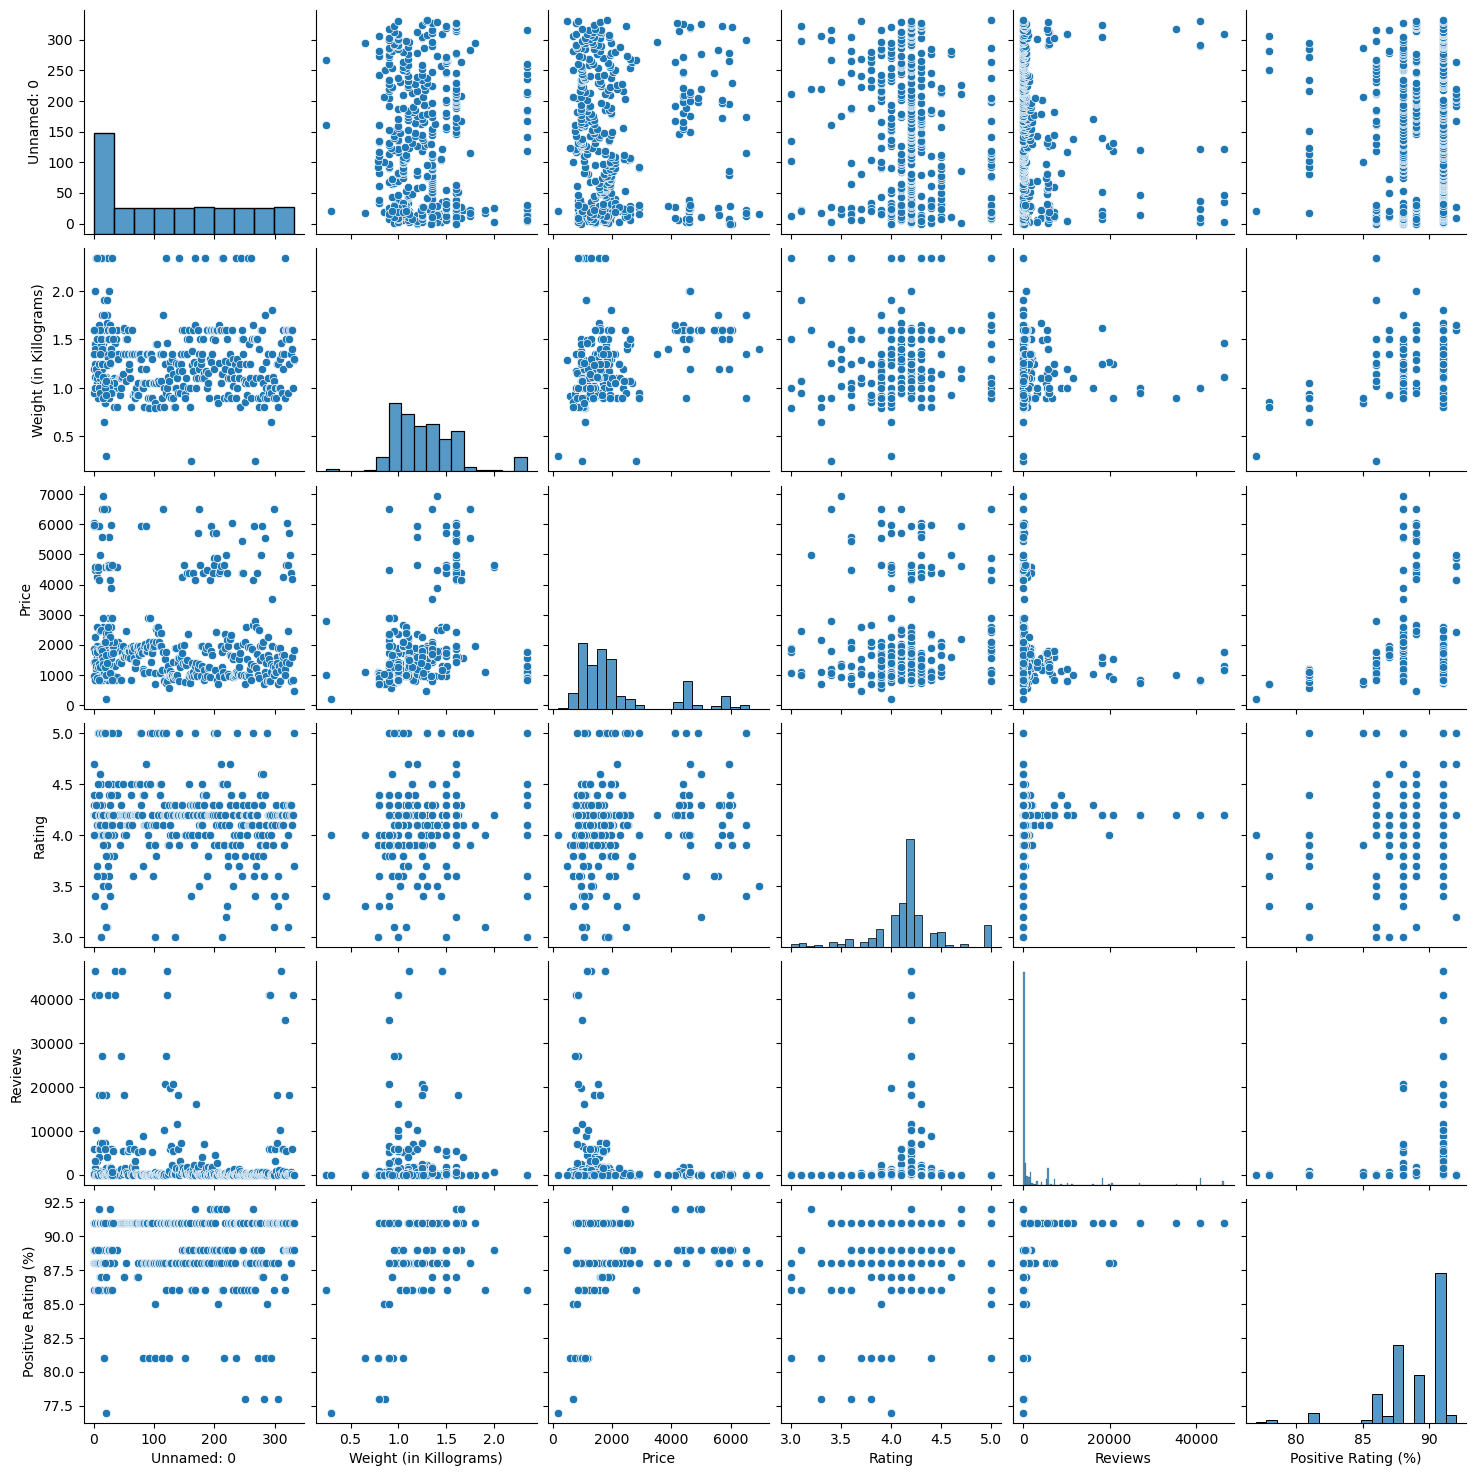

In [28]:
plt.figure(figsize=(10,6))
sns.pairplot(hd)

### 

#### brands dominates the Amozon helmet market

In [101]:
hd.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head()

Brand
SMK Helmets      4.710000
Studds           4.308000
XINOR            4.266667
TURTLE HELMET    4.200000
Royal Enfield    4.171212
Name: Rating, dtype: float64

<Axes: xlabel='AvgRating', ylabel='Brand'>

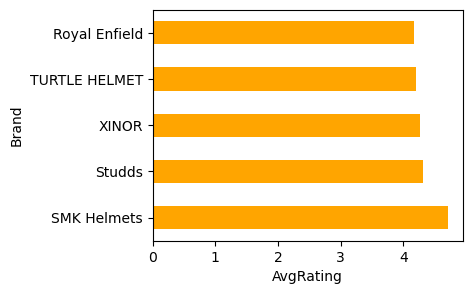

In [77]:
hd.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head().plot(kind='barh',figsize=(4,3),color='orange',xlabel='AvgRating')

#### customers prefering  helmets of a specific material

In [29]:
hd.groupby(hd['Material Used'])['Rating'].mean().sort_values(ascending=False).head()

C:\Users\sujit\AppData\Local\Temp\ipykernel_21628\4162577643.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hd.groupby(hd['Material Used'])['Rating'].mean().sort_values(ascending=False).head()


Material Used
Expanded Polystyrene (EPS)                            4.557895
expanded polystyrene                                  4.300000
Plastic                                               4.225000
thermoplastic                                         4.200000
High Impact ABS Material Shell with texture finish    4.200000
Name: Rating, dtype: float64

C:\Users\sujit\AppData\Local\Temp\ipykernel_21628\3206459719.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hd.groupby(hd['Material Used'])['Rating'].mean().sort_values(ascending=False).head().plot(kind='barh',figsize=(4,3),xlabel='AvgRating')


<Axes: xlabel='AvgRating', ylabel='Material Used'>

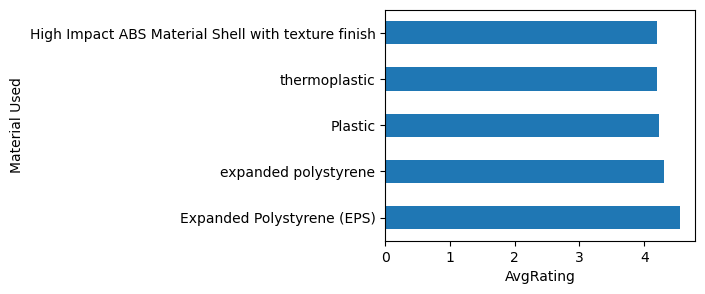

In [30]:
hd.groupby(hd['Material Used'])['Rating'].mean().sort_values(ascending=False).head().plot(kind='barh',figsize=(4,3),xlabel='AvgRating')

#### brands with high rating but lower price

In [32]:
avgrating=hd['Rating'].mean()
brands1=hd[(hd['Rating']>avgrating) & (hd['Price Status']=='Low')][['Brand','Rating','Price']]

In [33]:
brands1.groupby('Brand')[['Rating','Price']].mean()

,Rating,Price
Brand,,
Royal Enfield,4.520000,1946.400000
Steelbird,4.247619,1375.952381
Studds,4.475000,1519.681818
TURTLE HELMET,4.700000,1124.000000
TVS,4.476923,1200.000000
VEGA,4.333333,1822.666667
Vega,4.208434,1385.397590
XINOR,5.000000,815.000000
YAMAHA,4.200000,1881.000000


#### which coloured helemets are mostly used & popular

<Axes: title={'center': 'Popular colours'}, xlabel='AvgRating'>

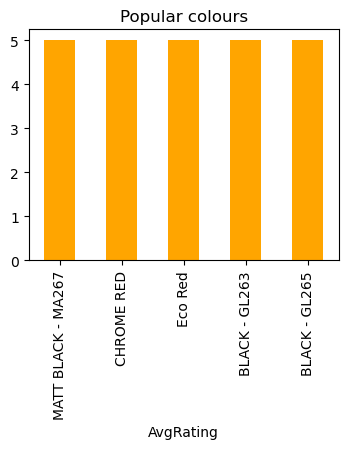

In [84]:
hd.groupby('Colour')['Rating'].mean().sort_values(ascending=False).head().plot(kind='bar',figsize=(4,3),xlabel='AvgRating',title='Popular colours',color='orange')

<Axes: title={'center': 'Most used colours'}, xlabel='Colour', ylabel='counts'>

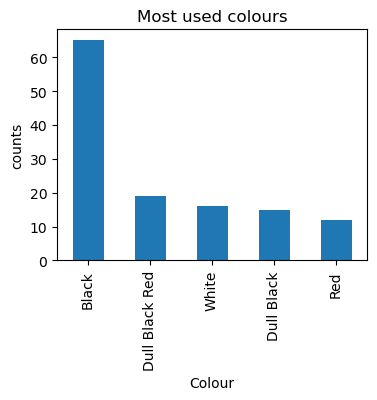

In [85]:
hd['Colour'].value_counts().sort_values(ascending=False).head().plot(kind='bar',figsize=(4,3),ylabel='counts',title='Most used colours')

#### lighter weight  vs medium helemet weights

In [69]:
hd.groupby(['Weight Status'])['Rating'].mean()

C:\Users\sujit\AppData\Local\Temp\ipykernel_18508\3987869277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hd.groupby(['Weight Status'])['Rating'].mean()


Weight Status
High Weight      4.227160
Low Weight       3.620000
Medium Weight    4.150437
Name: Rating, dtype: float64

C:\Users\sujit\AppData\Local\Temp\ipykernel_18508\3295744503.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hd.groupby(['Weight Status'])['Rating'].mean().plot(kind='pie',figsize=(4,3),autopct='%.2f%%',title='light weight vs medium weight')


<Axes: title={'center': 'light weight vs medium weight'}, ylabel='Rating'>

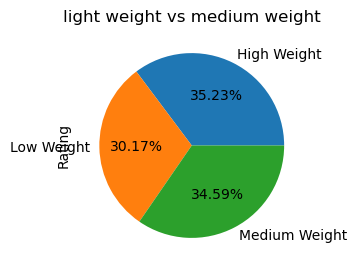

In [76]:
hd.groupby(['Weight Status'])['Rating'].mean().plot(kind='pie',figsize=(4,3),autopct='%.2f%%',title='light weight vs medium weight')

### insights & conclusions:

customer preferences are influenced by price ,weight, colour among different brands SMK Helmets, Studds ,XINOR ,TURTLE HELMET  brands are highly prefferd out of all colors black colured helemts are highly preferred
although price is a factor customers giving priority to brands over price

### Business conclusion:

This insight suggests that helmet manufacturers and sellers should focus on brand positioning, customer trust, and product differentiation rather than competing solely on price.